# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
def get_current_weather(city, api_key):
    
    url = "http://api.openweathermap.org/data/2.5/weather"
    payload = {
        "appid": api_key,
        "q": city
    }
    r = requests.get(url, params=payload)
    
    if r.status_code == 200:
        return r.json()
    else:
        return None

all_cities = []
for city in cities:
    result = get_current_weather(city, api_key)
    if result:
        all_cities.append(result)
df = pd.DataFrame([{
    "name": d["name"],
    "date_time": d["dt"],
    "lat": d["coord"]["lat"],
    "lon": d["coord"]["lon"],
    "temp": d["main"]["temp"],
    "temp_min": d["main"]["temp_min"],
    "temp_max": d["main"]["temp_max"],
    "humidity": d["main"]["humidity"],
    "wind_speed": d["wind"]["speed"],
    "clouds_pecent": d["clouds"]["all"],
} for d in all_cities])

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df.head()

,name,date_time,lat,lon,temp,temp_min,temp_max,humidity,wind_speed,clouds_pecent
0,Vaitape,1577916293,-16.52,-151.75,300.65,300.65,300.65,79,9.28,100
1,Yellowknife,1577916440,62.45,-114.38,259.15,259.15,259.15,92,2.60,90
2,Balkhash,1577916440,46.84,74.98,266.96,266.96,266.96,95,3.14,100
3,Avarua,1577916440,-21.21,-159.78,299.15,299.15,299.15,74,18.00,99
4,Grafton,1577916442,-29.69,152.93,297.50,296.15,298.15,88,0.65,34


In [5]:
df.to_csv("cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [6]:
#Convert temperature to Farenheight

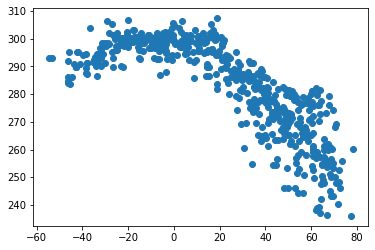

In [7]:
plt.scatter(df["lat"], df["temp"])

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot